# House price prediction

This is the start of a project to precict house prices, based on the [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) Kaggle competition.



In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
housing_data = pd.read_csv('datasets/train.csv')
housing_data.sample(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1050,1051,20,RL,73.0,8993,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,New,Partial,176485
1134,1135,60,RL,57.0,8773,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,169000
308,309,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,82500
729,730,30,RM,52.0,6240,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,WD,Normal,103000
820,821,60,RL,72.0,7226,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,183000


In [21]:
housing_data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


<AxesSubplot:>

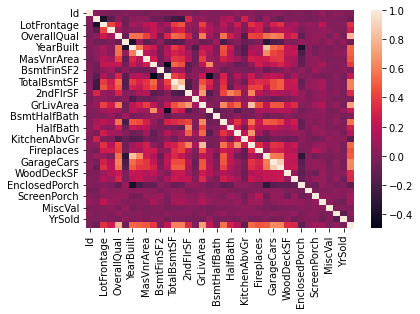

In [22]:
sns.heatmap(housing_data.corr())

In [23]:
housing_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [24]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [25]:
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [26]:
housing_data.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [27]:
housing_data.shape

(1460, 81)

In [28]:
housing_data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [29]:
housing_data.shape

(1460, 76)

In [30]:
housing_data.isnull().sum().sort_values(ascending=False)

LotFrontage     259
GarageType       81
GarageCond       81
GarageYrBlt      81
GarageFinish     81
               ... 
BsmtUnfSF         0
TotalBsmtSF       0
MSSubClass        0
HeatingQC         0
SalePrice         0
Length: 76, dtype: int64

In [31]:
housing_data.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
794,795,60,RL,NaN,10832,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,500,10,2008,WD,Normal,194500
818,819,80,RL,80.0,8816,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2010,WD,Normal,155000
445,446,20,RL,73.0,9855,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,11,2009,COD,Normal,127500
988,989,60,RL,NaN,12046,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2007,WD,Normal,195000
719,720,20,RL,69.0,9920,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2006,WD,Normal,128500


In [33]:
# Imputing missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
housing_data['LotFrontage'] = imputer.fit_transform(housing_data[['LotFrontage']])
housing_data['MasVnrType'] = imputer.fit_transform(housing_data[['MasVnrType']])
housing_data['MasVnrArea'] = imputer.fit_transform(housing_data[['MasVnrArea']])
housing_data['BsmtQual'] = imputer.fit_transform(housing_data[['BsmtQual']])
housing_data['BsmtCond'] = imputer.fit_transform(housing_data[['BsmtCond']])
housing_data['BsmtExposure'] = imputer.fit_transform(housing_data[['BsmtExposure']])
housing_data['BsmtFinType1'] = imputer.fit_transform(housing_data[['BsmtFinType1']])
housing_data['BsmtFinType2'] = imputer.fit_transform(housing_data[['BsmtFinType2']])
housing_data['Electrical'] = imputer.fit_transform(housing_data[['Electrical']])
housing_data['GarageType'] = imputer.fit_transform(housing_data[['GarageType']])
housing_data['GarageYrBlt'] = imputer.fit_transform(housing_data[['GarageYrBlt']])
housing_data['GarageFinish'] = imputer.fit_transform(housing_data[['GarageFinish']])
housing_data['GarageQual'] = imputer.fit_transform(housing_data[['GarageQual']])
housing_data['GarageCond'] = imputer.fit_transform(housing_data[['GarageCond']])
housing_data['BsmtFullBath'] = imputer.fit_transform(housing_data[['BsmtFullBath']])
housing_data['BsmtHalfBath'] = imputer.fit_transform(housing_data[['BsmtHalfBath']])
housing_data['GarageCars'] = imputer.fit_transform(housing_data[['GarageCars']])
housing_data['GarageArea'] = imputer.fit_transform(housing_data[['GarageArea']])
housing_data['TotalBsmtSF'] = imputer.fit_transform(housing_data[['TotalBsmtSF']])
housing_data['BsmtUnfSF'] = imputer.fit_transform(housing_data[['BsmtUnfSF']])
housing_data['BsmtFinSF1'] = imputer.fit_transform(housing_data[['BsmtFinSF1']])
housing_data['BsmtFinSF2'] = imputer.fit_transform(housing_data[['BsmtFinSF2']])
housing_data['MSZoning'] = imputer.fit_transform(housing_data[['MSZoning']])
housing_data['Utilities'] = imputer.fit_transform(housing_data[['Utilities']])
housing_data['Exterior1st'] = imputer.fit_transform(housing_data[['Exterior1st']])
housing_data['Exterior2nd'] = imputer.fit_transform(housing_data[['Exterior2nd']])
housing_data['KitchenQual'] = imputer.fit_transform(housing_data[['KitchenQual']])
housing_data['Functional'] = imputer.fit_transform(housing_data[['Functional']])
housing_data['SaleType'] = imputer.fit_transform(housing_data[['SaleType']])


In [34]:
housing_data.isnull().sum().sort_values(ascending=False)

Id              0
FullBath        0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
               ..
MasVnrType      0
Exterior2nd     0
Exterior1st     0
RoofMatl        0
SalePrice       0
Length: 76, dtype: int64

In [39]:
housing_tmp = housing_data.select_dtypes(include=['object'])
housing_tmp.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [40]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col in housing_tmp.columns:
    housing_data[col] = labelencoder.fit_transform(housing_data[col])



In [41]:
housing_data.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1150,1151,20,3,57.0,8280,1,0,3,0,4,...,214,0,0,0,0,11,2007,8,4,124000
658,659,50,3,78.0,17503,1,3,3,0,4,...,0,0,0,0,0,1,2010,8,0,97500
755,756,160,1,34.0,3230,1,3,3,0,4,...,0,0,0,0,0,3,2009,8,4,172500
746,747,60,3,60.0,8795,1,0,3,0,4,...,0,0,0,0,0,4,2009,8,4,236000
1143,1144,20,3,60.0,9000,1,3,3,0,4,...,0,0,0,0,0,7,2008,8,4,80000


In [42]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X = housing_data.drop(['SalePrice'], axis=1)
y = housing_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [43]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [44]:

regressor.score(X_test, y_test)

0.5810257297540808

In [45]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)


In [49]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)



2893373449.0962005

In [50]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.5810257297540808

In [52]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())


0.8465402882940033
0.07576188992909243


In [53]:
df = pd.read_csv('datasets/test.csv')
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
273,1734,20,RL,NaN,9316,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,5,2009,Oth,Family
982,2443,30,RM,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
1413,2874,50,RL,60.0,10890,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,7,2006,WD,Normal
1403,2864,60,RL,90.0,11060,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,ConLD,Normal
1200,2661,20,RL,121.0,13758,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2006,New,Partial


In [54]:

df.isnull().sum().sort_values(ascending=False)

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
FireplaceQu       730
                 ... 
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
SaleCondition       0
Length: 80, dtype: int64

In [55]:
df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

df['LotFrontage'] = imputer.fit_transform(df[['LotFrontage']])
df['MasVnrType'] = imputer.fit_transform(df[['MasVnrType']])
df['MasVnrArea'] = imputer.fit_transform(df[['MasVnrArea']])
df['BsmtQual'] = imputer.fit_transform(df[['BsmtQual']])
df['BsmtCond'] = imputer.fit_transform(df[['BsmtCond']])
df['BsmtExposure'] = imputer.fit_transform(df[['BsmtExposure']])
df['BsmtFinType1'] = imputer.fit_transform(df[['BsmtFinType1']])
df['BsmtFinType2'] = imputer.fit_transform(df[['BsmtFinType2']])
df['Electrical'] = imputer.fit_transform(df[['Electrical']])
df['GarageType'] = imputer.fit_transform(df[['GarageType']])
df['GarageYrBlt'] = imputer.fit_transform(df[['GarageYrBlt']])
df['GarageFinish'] = imputer.fit_transform(df[['GarageFinish']])
df['GarageQual'] = imputer.fit_transform(df[['GarageQual']])
df['GarageCond'] = imputer.fit_transform(df[['GarageCond']])
df['BsmtFullBath'] = imputer.fit_transform(df[['BsmtFullBath']])
df['BsmtHalfBath'] = imputer.fit_transform(df[['BsmtHalfBath']])
df['GarageCars'] = imputer.fit_transform(df[['GarageCars']])
df['GarageArea'] = imputer.fit_transform(df[['GarageArea']])
df['TotalBsmtSF'] = imputer.fit_transform(df[['TotalBsmtSF']])
df['BsmtUnfSF'] = imputer.fit_transform(df[['BsmtUnfSF']])
df['BsmtFinSF1'] = imputer.fit_transform(df[['BsmtFinSF1']])
df['BsmtFinSF2'] = imputer.fit_transform(df[['BsmtFinSF2']])
df['MSZoning'] = imputer.fit_transform(df[['MSZoning']])
df['Utilities'] = imputer.fit_transform(df[['Utilities']])
df['Exterior1st'] = imputer.fit_transform(df[['Exterior1st']])
df['Exterior2nd'] = imputer.fit_transform(df[['Exterior2nd']])
df['KitchenQual'] = imputer.fit_transform(df[['KitchenQual']])
df['Functional'] = imputer.fit_transform(df[['Functional']])
df['SaleType'] = imputer.fit_transform(df[['SaleType']])

In [57]:
df.dropna(inplace=True)

In [59]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col in housing_tmp.columns:
    df[col] = labelencoder.fit_transform(df[col])

In [61]:

y_pred = regressor.predict(df)


In [62]:
# Creating a submission file
my_submission = pd.DataFrame({'Id': df.Id, 'SalePrice': y_pred})


In [63]:
my_submission.to_csv('submission.csv', index=False)